# library

In [12]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# parameter space

## read data - aerosol

In [13]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
print(len(s))
print(s)
# print('bulk_'+ s[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
11    h2o
dtype: object


In [14]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

In [15]:
d_bulk = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
        'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
        'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
        'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
        'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
        'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
        'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
        'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
        'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
        'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
        'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
        'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
        'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_bulk = pd.DataFrame(data=d_bulk)
print(df_bulk.shape)
df_bulk_2ndngt = df_bulk[((df_bulk.index.values % 49) >= 37) & ((df_bulk.index.values % 49) <= 48)]  # ngt: night
print(df_bulk_2ndngt.shape)

(4900, 13)
(1200, 13)


## read data - gas

In [16]:
s1 = pd.Series(['n2o5','o3','no','no2','hno3','h2so4','hcl','nh3'])
print(len(s1))
print(s1)

8
0     n2o5
1       o3
2       no
3      no2
4     hno3
5    h2so4
6      hcl
7      nh3
dtype: object


In [17]:
# Read data
gas_mixing_ratio = np.zeros((100, 49, 77))
sce_ind = np.zeros(100)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [18]:
d_gas = {'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
         'o3': gas_mixing_ratio[:, :, 10].ravel(),
         'no': gas_mixing_ratio[:, :, 4].ravel(),
         'no2': gas_mixing_ratio[:, :, 5].ravel(),
         'hno3': gas_mixing_ratio[:, :, 1].ravel(),
         'h2so4': gas_mixing_ratio[:, :, 0].ravel(),
         'hcl': gas_mixing_ratio[:, :, 2].ravel(),
         'nh3': gas_mixing_ratio[:, :, 3].ravel(),
         }
df_gas = pd.DataFrame(data=d_gas)

## read data - combined

In [19]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[295.874 295.874 295.874 ... 295.874 295.874 295.874]
 [290.237 290.237 290.237 ... 290.237 290.237 290.237]
 [265.51  265.51  265.51  ... 265.51  265.51  265.51 ]
 ...
 [284.995 284.995 284.995 ... 284.995 284.995 284.995]
 [271.923 271.923 271.923 ... 271.923 271.923 271.923]
 [244.648 244.648 244.648 ... 244.648 244.648 244.648]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [20]:
hno3_mass_conc = gas_mixing_ratio[:, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp)
h2so4_mass_conc = gas_mixing_ratio[:, :, 0].ravel()*(df_env.p*98e-3)/(8.314*df_env.temp)

d_species = {'nitrate': hno3_mass_conc + bulk_masses[0,:,:].ravel(),
             'sulfate': h2so4_mass_conc + bulk_masses[1,:,:].ravel(),
             'oc': bulk_masses[2,:,:].ravel(),
             'soa': bulk_masses[3,:,:].ravel(),
             'dust': bulk_masses[8,:,:].ravel(),
             'h2o': bulk_masses[11,:,:].ravel(),
             'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
             'o3': gas_mixing_ratio[:, :, 10].ravel(),
             'no': gas_mixing_ratio[:, :, 4].ravel(),
             'no2': gas_mixing_ratio[:, :, 5].ravel(),}
df_species = pd.DataFrame(data = d_species)
print(df_species.shape)

(4900, 10)


In [21]:
s2 = pd.Series(['nitrate','sulfate','oc','soa','dust','h2o','n2o5','o3','no','no2'])
print(len(s2))
print(s2)

10
0    nitrate
1    sulfate
2         oc
3        soa
4       dust
5        h2o
6       n2o5
7         o3
8         no
9        no2
dtype: object


## plot

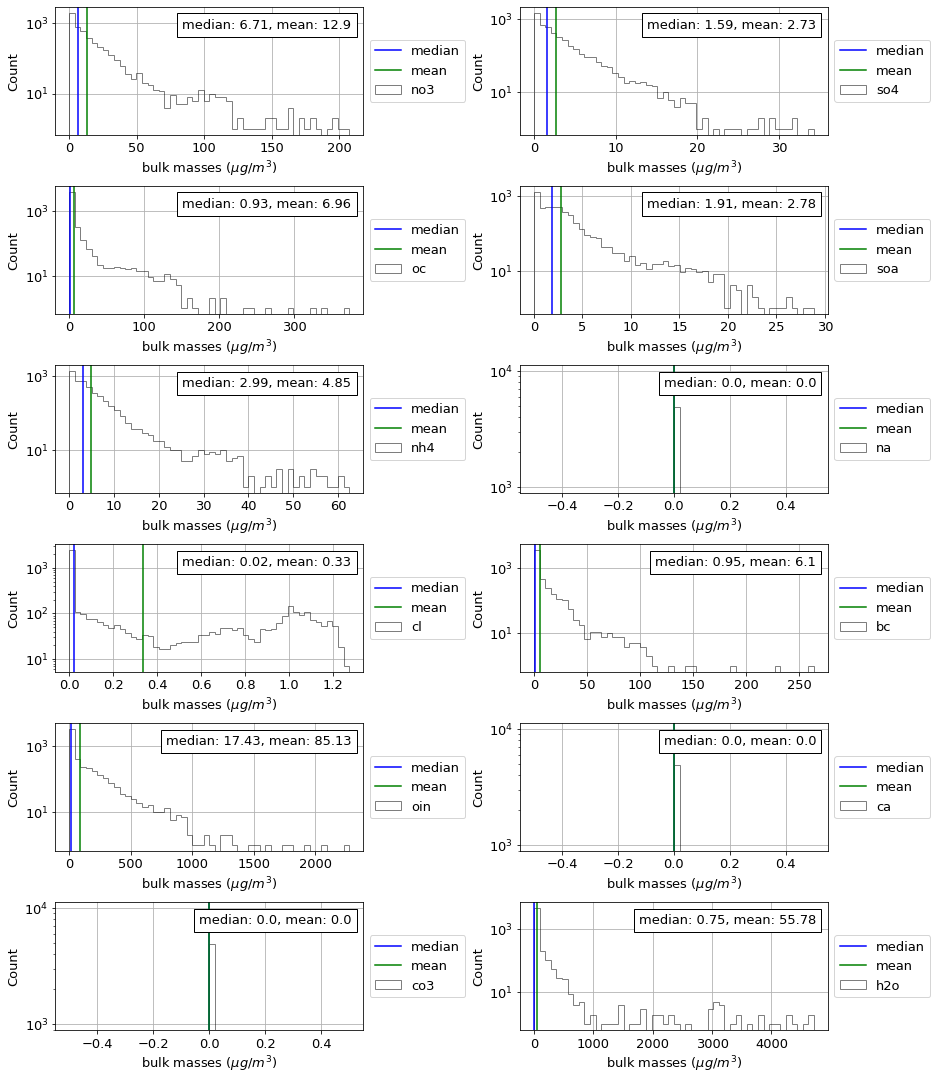

In [22]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(6,2,figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,12,2):
    ax[p,0].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,0].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,0].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,13,2):
    ax[p,1].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,1].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

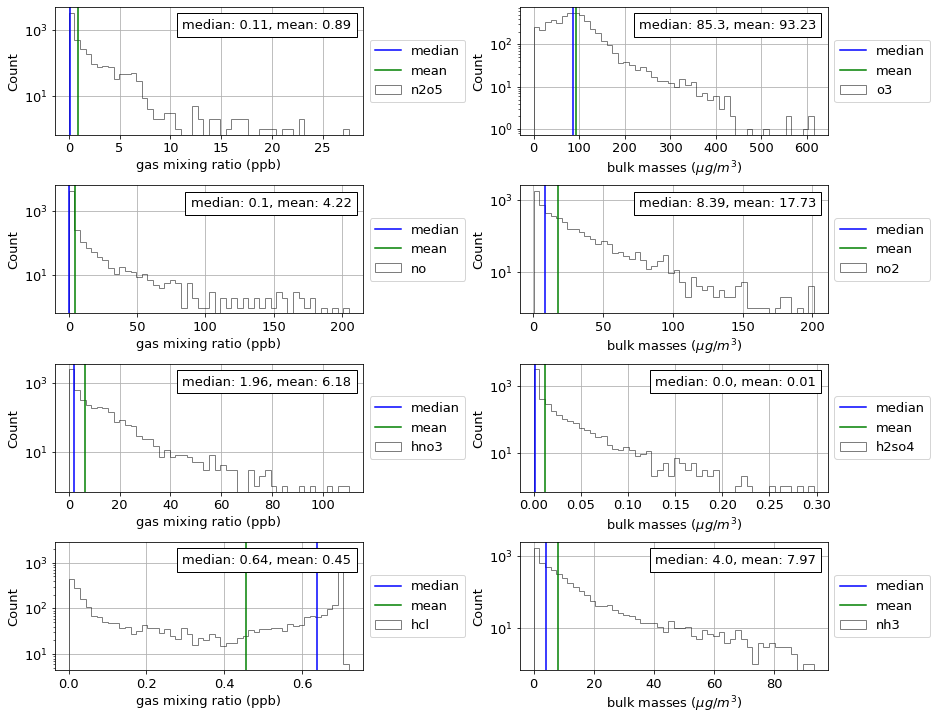

In [23]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(4,2,figsize=(13,10))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,8,2):
    ax[p,0].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,0].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,0].set_xlabel('gas mixing ratio (ppb)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,9,2):
    ax[p,1].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,1].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

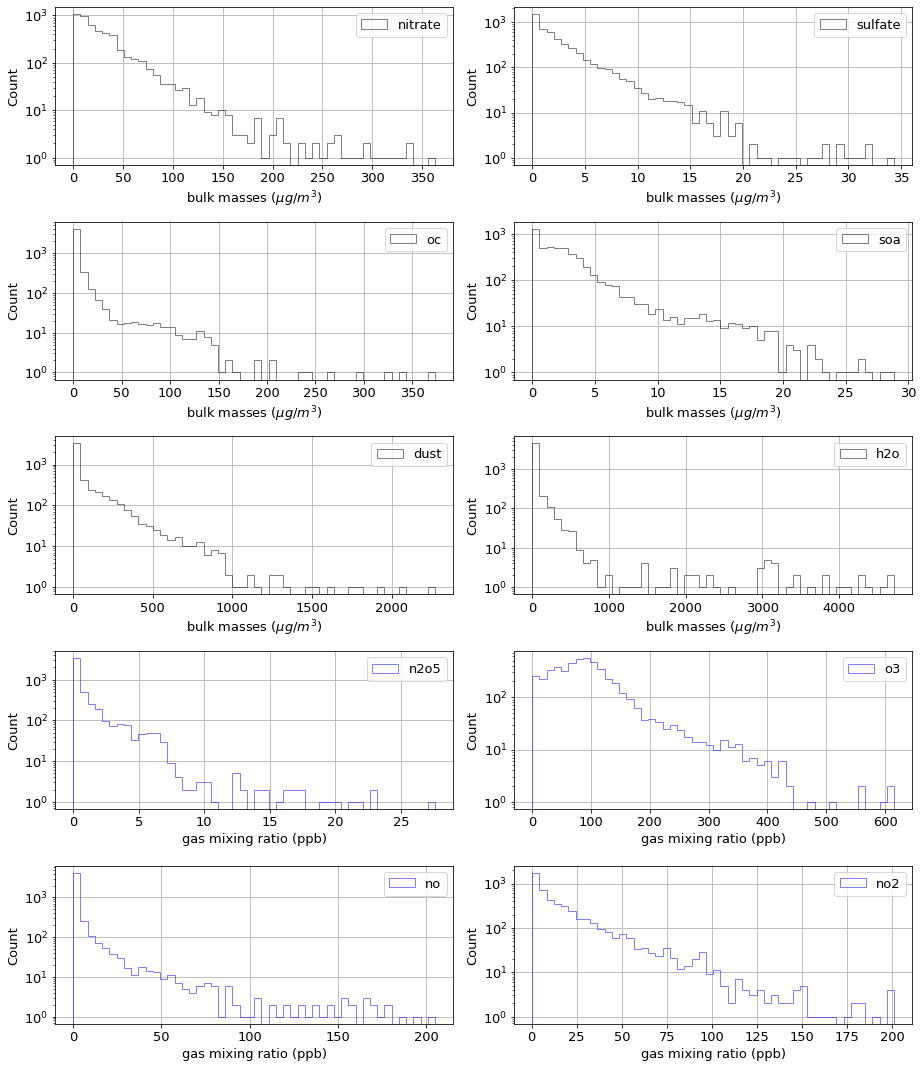

In [46]:
plt.figure(figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

for i in range(6):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'bulk masses ($\mu g/m^3$)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
for i in [6,7,8,9]:
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'b', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'gas mixing ratio (ppb)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid() 
plt.tight_layout(pad = 1.0)
# plt.savefig('1.pdf')

(1e-05, 1000.0)

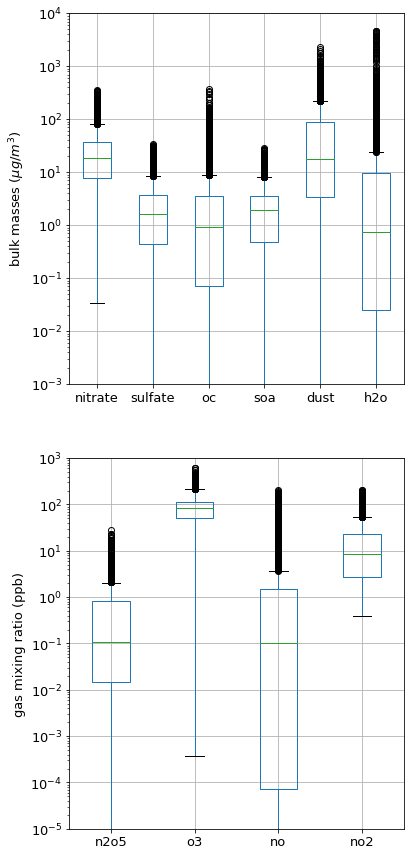

In [27]:
plt.figure(figsize=(6,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

plt.subplot(2,1,1)
df_species.boxplot(column = ['nitrate','sulfate','oc','soa','dust','h2o'])
plt.yscale('log')
plt.ylabel(r'bulk masses ($\mu g/m^3$)')
plt.ylim(1e-3,1e4)

plt.subplot(2,1,2)
df_species.boxplot(column = ['n2o5','o3','no','no2'])
plt.yscale('log')
plt.ylabel(r'gas mixing ratio (ppb)')
plt.ylim(1e-5,1e3)

# gamma_pop

## read data

In [12]:
# no seasalt & dust
gamma_pop = np.zeros((3,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

In [16]:
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()    

d_gamma = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_gamma = pd.DataFrame(data=d_gamma)
print(df_gamma.shape)

df_gamma_2ndngt = df_gamma[((df_gamma.index.values % 49) >= 37) & ((df_gamma.index.values % 49) <= 48)]  # ngt: night
# pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_gamma_2ndngt.shape)
# print(df_nsd_2ndngt)

df1 = df_gamma_2ndngt.dropna()
# print(df1.shape)
null_data = df_gamma_2ndngt[df_gamma_2ndngt.isnull().any(axis=1)]
case_index = null_data.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(null_data.shape)
print(df_gamma_2ndngt['gamma_pop_error'].max())

(4900, 3)
(1200, 3)
[ 4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
 19 19 19 19 19 19 19 19 19 19 19 19 23 23 23 23 23 23 23 23 23 23 23 23
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 27
 29 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 30 30
 32 32 32 32 32 32 32 32 32 32 32 32 37 37 37 37 37 37 37 37 37 37 37 37
 49 49 49 49 49 49 49 49 49 49 49 49 51 51 51 51 51 51 51 51 51 51 51 51
 53 53 53 53 53 53 53 53 53 53 53 53 61 61 61 61 61 61 61 61 61 61 61 61
 65 65 65 65 65 65 65 65 65 65 65 65 68 68 68 68 68 68 68 68 68 68 68 68
 84 84 84 84 84 84 84 84 84 84 84 84 88 88 88 88 88 88 88 88 88 88 88 88
 91 91 91 91 91 91 91 91 91 91 91 91 95 95 95 95 95 95 95 95 95 95 95 95
 98 98 98 98 98 98 98 98 98 98 98 98]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46

## plot

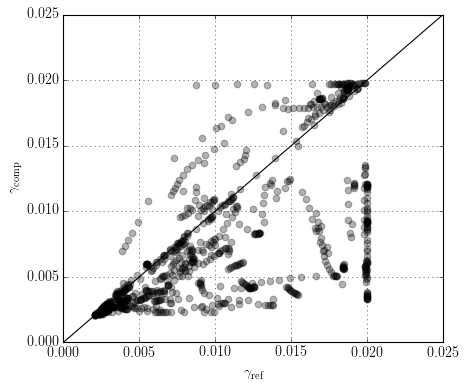

In [52]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
###################
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3, vmin=0, vmax=30)
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
# plt.title('Library without sea salt and dust emissions')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('2.pdf')

note: (49+420)/(1200-252) = 49.5% of population have +/- 20% error

# size distributions

## positions on scatter plot

In [55]:
# Find positions on 1:1 line
nsd_case_index = df_gamma_2ndngt.index.values
nsd_sce_index  = (nsd_case_index/49).astype(int)
nsd_hour_index = nsd_case_index % 49

df_on = df_gamma_2ndngt[((np.abs(df_gamma_2ndngt["gamma_pop_error"])) < 1)]
df_above = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) >= 20)]
df_below = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) <= -20)]

### on

In [56]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_on.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[ 7  7 54 28 40 35 28  6 28 13  7  7 35 13 25 41 54  7 13 41 54 35 54  6
 52  6 28 52 54 54 52 41 40 13  7 52 52 71 13 35 71  6 52 41 13 52 52 52
  7 13 52 40 28 35 86  7 45 45 45 45 45 71 41  7 45 35 40 25 45 41  6 52
 28 41 45 40 12 41 41 35 41 41 41 86  7 45 71 45 45 54 25 25 28 25 45  7
 28 28 28 70 25  7 16 64 25 25 25 25 16]
[38 39 41 47 44 48 48 46 44 42 40 37 47 43 37 37 40 41 44 38 38 46 39 39
 40 47 43 41 37 44 42 39 45 45 42 43 44 38 46 45 37 48 39 40 47 45 47 46
 43 48 48 46 42 44 44 44 37 38 40 39 41 39 41 45 42 43 47 38 43 42 38 38
 41 43 44 48 42 44 45 42 46 47 48 43 46 45 40 46 47 43 48 47 40 46 48 47
 39 38 37 48 39 48 48 38 45 44 43 42 47]
(109, 3)


### above

In [57]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_above.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_above.shape)

[ 3 24 81 81 59  3 81 24 81  3  3 69 57  3 69  3 69 18 69  3 72  3 18 69
 18 18 72 18 69 57 18 18 18 18 18 18 69 18 69 72 57 57 57 57 57 57 57 72
 72]
[41 37 40 39 39 45 38 45 37 44 46 43 40 47 42 48 41 37 40 42 41 43 38 39
 39 40 40 48 44 41 47 41 46 45 42 44 38 43 37 39 48 47 46 45 44 43 42 38
 37]
(49, 3)


### below

In [58]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_below.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[ 2  2  2  2  2  2  2  2  2  2  2  2 97 97 97 97 97 97 15 56 77 56 36 77
 56 63 97 15 14 56 56 77 36 56 15 15 56 82 11 56 36 15 56 15 97 56 14 11
 36 60 60 60 15 82 60 36 56 15 60 36 36 36 44 15 56 15 36 77 15 15 87 36
 87 60 11 44 36 63 63 63 87 63 87 63 63 63 82 63 87 63 36 60 63 44 97 63
 60 87 77 80 80 80 60 80 80 11 80 80 80 44 80 77 80 60 80 82 77 80 38 77
 60 38 14 44 77 38 60 38 77 38 11 77 87 38 97 44 77 38 82 33 38 50 11 44
 33 38 74 33 94 92 89 14 89 14 43 44 11 87 97 92 14 50 74 14 89 33 82 82
 14 82 82 82 11 82 82 44 14 43 50 74 92 11 14 97 50 11 14 92 87 11 44 89
 11 74 50 38 43 69 33 14 50 50 50 22 22 22 22 22 50 22 22 22 22 22 22 33
 50 33 50 33 22 50 87 69 43 44 74 87 89 92 87 96 33 43 96 94 94 44 94 69
 94 74 94 94 94 96 94 94 94 94 74 34 34 34 43 38 96 89 92 21 21  1 92 92
 34 96 92 21 34 92 33 96 34 92 21 34 73 34 73 73  1 43 73 96 74 58 34 34
 74 58 58 58 58 48 58 96 72 58 34 58  1 58 89  1 96  1 72 72 58  1 96 96
 58 92 96  9  1 34 66  1  1 48 21  1 72 74 74  1  1

## read data

In [63]:
h1 = np.zeros((100,49,180)) # gamma * surf_dist
h2 = np.zeros((100,49,180)) # surf_area_dist
hgamma = np.zeros((100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[sce_index, t_index,:] = h1[sce_index, t_index,:]/h2[sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

## plot

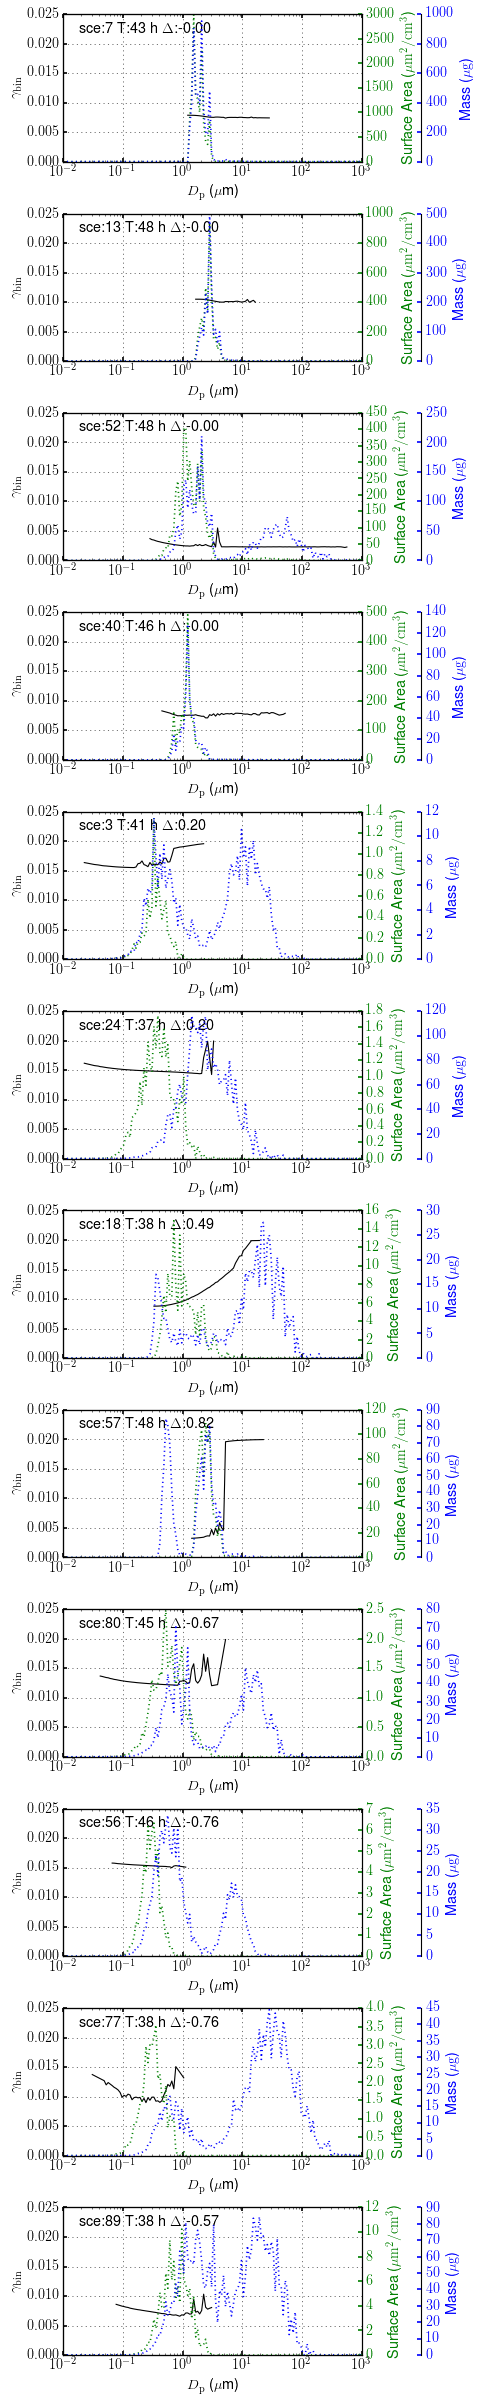

In [86]:
fig, ax = plt.subplots(12,figsize=(6,30))
fig.subplots_adjust(right=0.75)

sce_index = [7,13,52,40,3,24,18,57,80,56,77,89]
t_index = [43,48,48,46,41,37,38,48,45,46,38,38]

for i in range(12):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    # twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    # twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[sce_index[i], t_index[i],:])

    w = wi_dist[sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam[ym], y[ym], color = "k", ls = '-', lw = 1)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "g", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "b", ls = ':', lw = 1.5)
    # p4 = twin3.plot(diam[wm], w[wm], color = "c", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0,0.025)
    # twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm p}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm \mu g$)')
    # twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('k')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('b')
    # twin3.yaxis.label.set_color('c')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='k', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='b', **tkw)
    # twin3.tick_params(axis='y', colors='c', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(0.018, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

plt.tight_layout(pad=0.5)
# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

# k_n2o5

## read data

In [2]:
# read in data with dust emission
reac_coeff_dust = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            reac_coeff_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            reac_coeff_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600

In [52]:
# calculate gamma_pop_error
reac_coeff_error_dust = (reac_coeff_dust[1,:,:].ravel() - 
               reac_coeff_dust[0,:,:].ravel())/reac_coeff_dust[0,:,:].ravel()

d_k_dust = {"n2o5_uptake_ref": reac_coeff_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
            "n2o5_uptake_comp": reac_coeff_dust[1, :, :].ravel(),
            "reac_coeff_error": reac_coeff_error_dust * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_k_dust = pd.DataFrame(data=d_k_dust)
print(df_k_dust.shape)

df_k_dust_2ndngt = df_k_dust[((df_k_dust.index.values % 49) >= 37) & ((df_k_dust.index.values % 49) <= 48)]
print(df_k_dust_2ndngt.shape)

df3 = df_k_dust_2ndngt.dropna()
print(df3.shape)
null_data = df_k_dust_2ndngt[df_k_dust_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df_highk = df3[df3['n2o5_uptake_ref']>=1e-4]
print(df_highk)

(4900, 3)
(1200, 3)
(948, 3)
[ 4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
 19 19 19 19 19 19 19 19 19 19 19 19 23 23 23 23 23 23 23 23 23 23 23 23
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 27
 29 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 30 30
 32 32 32 32 32 32 32 32 32 32 32 32 37 37 37 37 37 37 37 37 37 37 37 37
 49 49 49 49 49 49 49 49 49 49 49 49 51 51 51 51 51 51 51 51 51 51 51 51
 53 53 53 53 53 53 53 53 53 53 53 53 61 61 61 61 61 61 61 61 61 61 61 61
 65 65 65 65 65 65 65 65 65 65 65 65 68 68 68 68 68 68 68 68 68 68 68 68
 84 84 84 84 84 84 84 84 84 84 84 84 88 88 88 88 88 88 88 88 88 88 88 88
 91 91 91 91 91 91 91 91 91 91 91 91 95 95 95 95 95 95 95 95 95 95 95 95
 98 98 98 98 98 98 98 98 98 98 98 98]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43

## plot

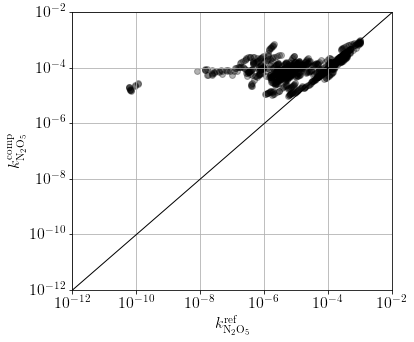

In [53]:
# Only nighttime cases

# from matplotlib import style
# plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
plt.xscale('log'); plt.yscale('log')
plt.plot([1e-15,1e-2],[1e-15,1e-2],'-', color='k',lw=1)
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["n2o5_uptake_ref"]
y = df3["n2o5_uptake_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3)
plt.xlim(1e-12,1e-2);plt.ylim(1e-12,1e-2)
plt.xlabel(r'$k_{\rm N_2O_5}^{\rm ref}$')
plt.ylabel(r'$k_{\rm N_2O_5}^{\rm comp}$')
# plt.text(0.0015, 0.023, r'$(a)\,dust)$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# chi

## read data

In [26]:
# read in data with dust emission
gamma_pop = np.zeros((2,100,49))
k = np.zeros((2,100,49))
chi_n2o5 = np.zeros((6,2,100,49))
bulk_masses = np.zeros((100,49))
wet_frac = np.zeros((2,100,49))
npart = np.zeros((2,100,49))
nwet = np.zeros((2,100,49))
tot_surf_area = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            k[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            k[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            chi_n2o5[0, 0, sce, :] = ncf.variables["chi_pr"].data
            chi_n2o5[0, 1, sce, :] = ncf.variables["chi_comp"].data
            chi_n2o5[1, 0, sce, :] = ncf.variables["chi_h2o_pr"].data
            chi_n2o5[1, 1, sce, :] = ncf.variables["chi_h2o_comp"].data
            chi_n2o5[2, 0, sce, :] = ncf.variables["chi_no3_pr"].data
            chi_n2o5[2, 1, sce, :] = ncf.variables["chi_no3_comp"].data
            chi_n2o5[3, 0, sce, :] = ncf.variables["chi_so4_pr"].data
            chi_n2o5[3, 1, sce, :] = ncf.variables["chi_so4_comp"].data
            chi_n2o5[4, 0, sce, :] = ncf.variables["chi_org_pr"].data
            chi_n2o5[4, 1, sce, :] = ncf.variables["chi_org_comp"].data
            chi_n2o5[5, 0, sce, :] = ncf.variables["chi_dust_pr"].data
            chi_n2o5[5, 1, sce, :] = ncf.variables["chi_dust_comp"].data
            bulk_masses[sce, :] = ncf.variables['bulk_h2o_masses'].data * 1e9  # kg to µg
            nwet[0, sce, :] = ncf.variables['nwet'].data
            nwet[1, sce, :] = ncf.variables['nwet_avg'].data
            npart[0, sce, :] = ncf.variables['npart'].data
            npart[1, sce, :] = ncf.variables['npart_avg'].data
            tot_surf_area[0, sce, :] = ncf.variables['tot_surf_area_pr'].data
            tot_surf_area[1, sce, :] = ncf.variables['tot_surf_area_avg'].data
            time = ncf.variables["time"].data/3600
            wet_frac[0, sce,:] = nwet[0, sce, :]/npart[0, sce, :]
            wet_frac[1, sce,:] = nwet[1, sce, :]/npart[1, sce, :]

In [27]:
rh = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    rh[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,2] # time, temperature, RH, pressure, mixing height

print(rh.shape)
print(rh)
# print(df_env)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[0.7532 0.7532 0.7532 ... 0.7532 0.7532 0.7532]
 [0.3586 0.3586 0.3586 ... 0.3586 0.3586 0.3586]
 [0.2908 0.2908 0.2908 ... 0.2908 0.2908 0.2908]
 ...
 [0.5696 0.5696 0.5696 ... 0.5696 0.5696 0.5696]
 [0.2162 0.2162 0.2162 ... 0.2162 0.2162 0.2162]
 [0.5165 0.5165 0.5165 ... 0.5165 0.5165 0.5165]]


In [28]:
# calculate gamma_pop_error
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
k_error = (k[1,:,:].ravel() - 
           k[0,:,:].ravel())/k[0,:,:].ravel()
tot_surf_area_diff = (tot_surf_area[1, :, :].ravel() - tot_surf_area[0, :, :].ravel())/tot_surf_area[0, :, :].ravel()

d_chi = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
          "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
          "gamma_pop_error": gamma_pop_error * 100,
          "k_ref": k[0, :, :].ravel(),  # wsd: with seasalt and dust
          "k_comp": k[1, :, :].ravel(),
          "k_error": k_error * 100,
          "chi_pr": chi_n2o5[0,0,:,:].ravel() * 100,
          "chi_comp": chi_n2o5[0,1,:,:].ravel() * 100,
          "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100,
          "chi_h2o_comp": chi_n2o5[1,1,:,:].ravel() * 100,
          "chi_no3_pr": chi_n2o5[2,0,:,:].ravel() * 100,
          "chi_no3_comp": chi_n2o5[2,1,:,:].ravel() * 100,
          "chi_so4_pr": chi_n2o5[3,0,:,:].ravel() * 100,
          "chi_so4_comp": chi_n2o5[3,1,:,:].ravel() * 100,
          "chi_org_pr": chi_n2o5[4,0,:,:].ravel() * 100,
          "chi_org_comp": chi_n2o5[4,1,:,:].ravel() * 100,
          "chi_dust_pr": chi_n2o5[5,0,:,:].ravel() * 100,
          "chi_dust_comp": chi_n2o5[5,1,:,:].ravel() * 100,
          'wet_frac_pr': wet_frac[0,:,:].ravel() * 100,
          'wet_frac_comp': wet_frac[1,:,:].ravel() * 100,
          'tot_surf_area_diff': tot_surf_area_diff * 100,
          'rh': rh[:,:].ravel() * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_chi = pd.DataFrame(data=d_chi)
print(df_chi.shape)

df_chi_2ndngt = df_chi[((df_chi.index.values % 49) >= 37) & ((df_chi.index.values % 49) <= 48)]
print(df_chi_2ndngt.shape)

df4 = df_chi_2ndngt.dropna()
print(df4.shape)
print(df4.iloc[:,8])

(4900, 22)
(1200, 22)
(948, 22)
37      36.718593
38      37.300823
39      38.591638
40      40.341499
41      42.558189
          ...    
4895    43.086609
4896    43.049819
4897    43.039183
4898    42.975649
4899    42.895812
Name: chi_h2o_pr, Length: 948, dtype: float64


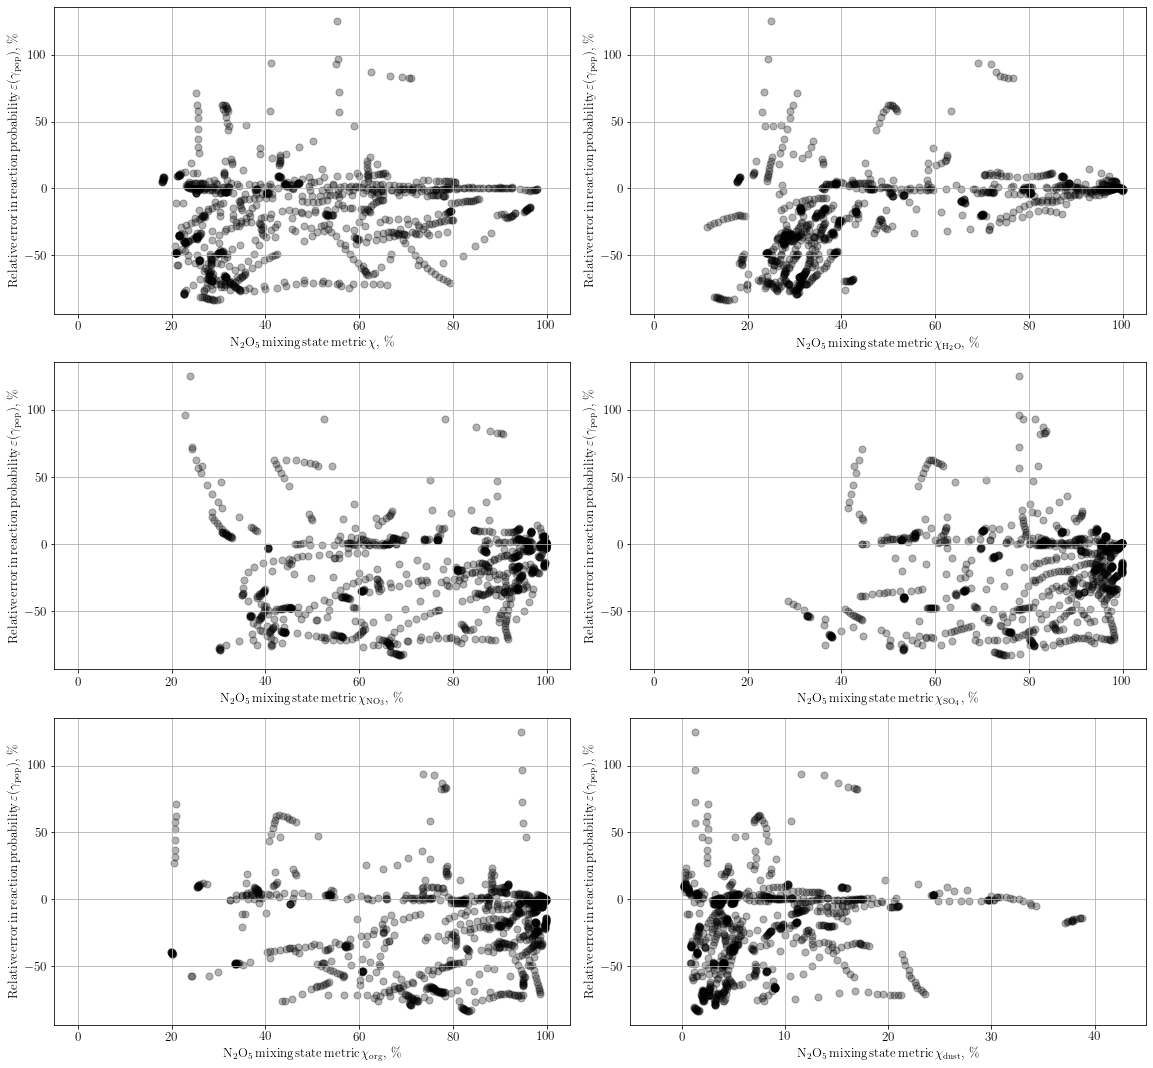

In [29]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,6)
im1 = plt.scatter(df4.chi_dust_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,45)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm dust}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

(-5.0, 105.0)

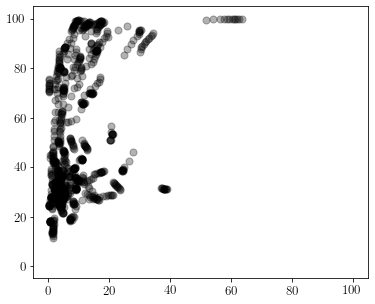

In [32]:
plt.figure(figsize=(6,5))
im1 = plt.scatter(df4.chi_dust_pr, df4.chi_h2o_pr, color = 'k', alpha = 0.3, s= 50)
plt.xlim(-5,105)
plt.ylim(-5,105)

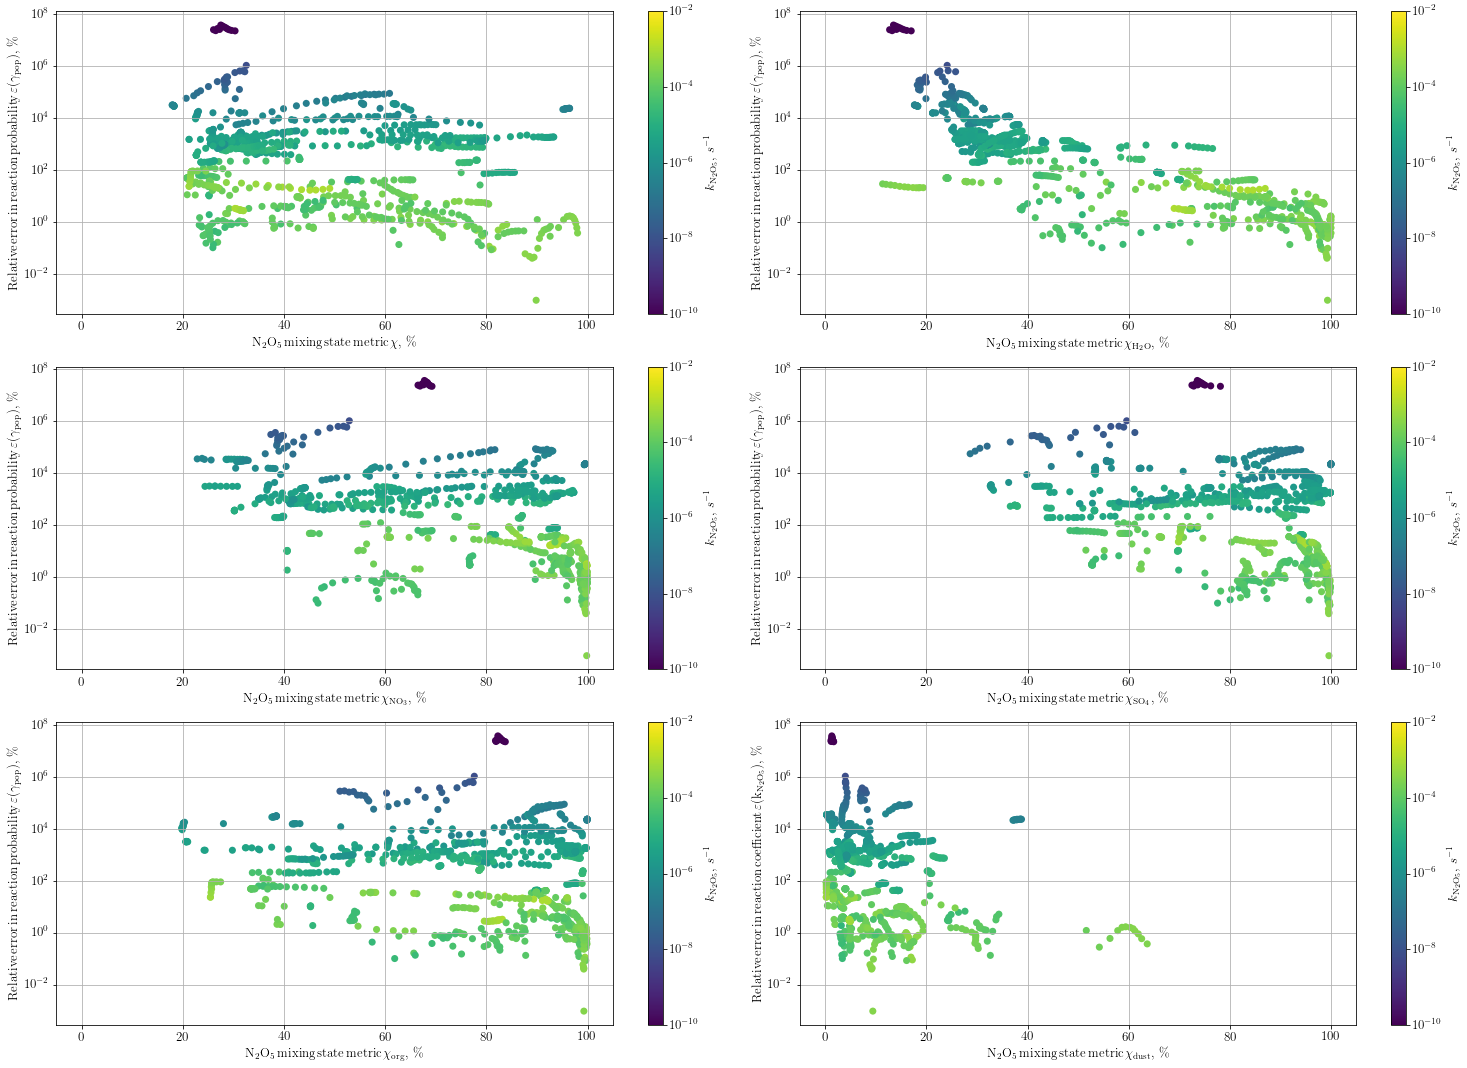

In [6]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,6)
im1 = plt.scatter(df4.chi_dust_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm dust}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, coefficient \, \varepsilon(k_{\rm N_2O_5}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

# low chi value cases

## selection

In [8]:
df_dust_lowchi = df4[(df4.chi_h2o_pr <= 20)]
print(df_dust_lowchi.shape)
print(df_dust_lowchi.sort_values('chi_h2o_pr', ascending=True))

case_index = df_dust_lowchi.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

(49, 22)
      gamma_pop_ref  gamma_pop_comp  gamma_pop_error         k_ref    k_comp  \
4104       0.007156        0.005108       -28.622496  1.808608e-04  0.000129   
4105       0.007915        0.005743       -27.447548  2.122475e-04  0.000154   
135        0.019999        0.003804       -80.980628  1.117495e-10  0.000027   
4106       0.008593        0.006348       -26.116068  2.465529e-04  0.000182   
136        0.019999        0.003745       -81.275078  1.143007e-10  0.000026   
139        0.019999        0.003573       -82.132954  5.757644e-11  0.000021   
137        0.019999        0.003685       -81.572864  8.924810e-11  0.000024   
4107       0.009166        0.006891       -24.819144  2.791926e-04  0.000210   
140        0.019999        0.003513       -82.434477  5.882021e-11  0.000020   
138        0.019999        0.003621       -81.892514  9.127428e-11  0.000023   
141        0.019999        0.003455       -82.722969  6.010093e-11  0.000019   
142        0.019999        0.00

## read data

In [9]:
s3 = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','h2o','ca','co3'])
print(len(s3))
print(s3)
print('bulk_'+ s3[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9     h2o
10     ca
11    co3
dtype: object
bulk_no3_masses


In [11]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s3[i] + '_masses'].data * 1e9  # kg to µg

d_m = {'inorganics': (bulk_masses[0,:,:].ravel() + bulk_masses[1,:,:].ravel() + bulk_masses[4,:,:].ravel()
                    + bulk_masses[5,:,:].ravel() + bulk_masses[6,:,:].ravel() + bulk_masses[7,:,:].ravel()
                    + bulk_masses[10,:,:].ravel() + bulk_masses[11,:,:].ravel()),
        'oin': bulk_masses[8,:,:].ravel(),
        'h2o': bulk_masses[9,:,:].ravel(),
        'organics': (bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()),
        "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100}
df_m = pd.DataFrame(data=d_m)
print(df_m.shape)
# print(df_m)
df_m_2ndngt = df_m[((df_m.index.values % 49) >= 37) & ((df_m.index.values % 49) <= 48)]  # ngt: night
print(df_m_2ndngt.shape)
df_m_lowchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr <=20)]
print(df_m_lowchi.shape)
df_m_lowchi.round({'chi_h2o_pr':2})

df_m_highchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr >=98)]
print(df_m_highchi.shape)
df_m_highchi.round({'chi_h2o_pr':2})
# print(df_m_lowchi)

(4900, 5)
(1200, 5)
(49, 5)
(45, 5)


,inorganics,oin,h2o,organics,chi_h2o_pr
331,85.367627,2.017753,163.735842,5.635873,99.72
332,106.424913,1.897137,204.050398,8.046746,99.82
333,125.917153,1.779256,241.122658,11.316895,99.87
334,143.238664,1.696842,273.910507,14.991087,99.90
335,161.637849,1.603429,308.683545,19.058298,99.92
336,176.373097,1.536186,336.534998,22.124360,99.93
337,189.539967,1.438476,361.513546,24.417116,99.94
338,203.347466,1.382137,387.870884,26.040468,99.95
339,215.883401,1.319597,411.995067,26.604756,99.95
340,224.998939,1.264154,429.748925,25.957154,99.96


<AxesSubplot:xlabel='chi_h2o_pr'>

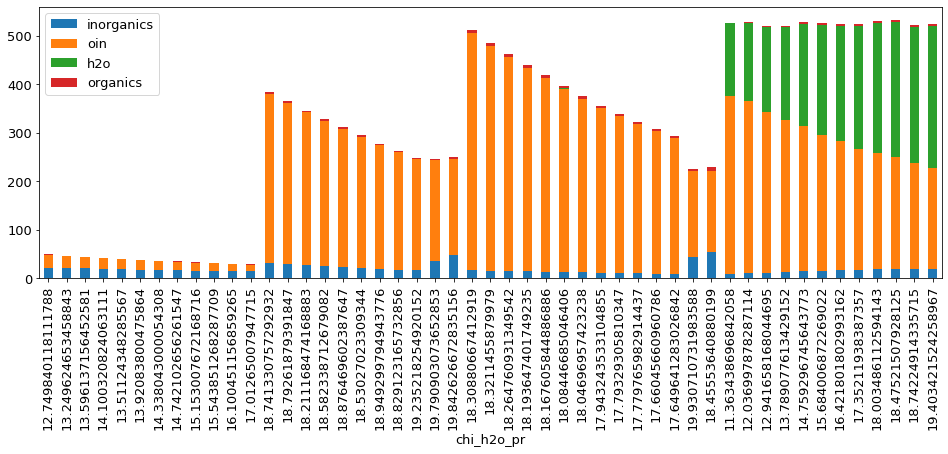

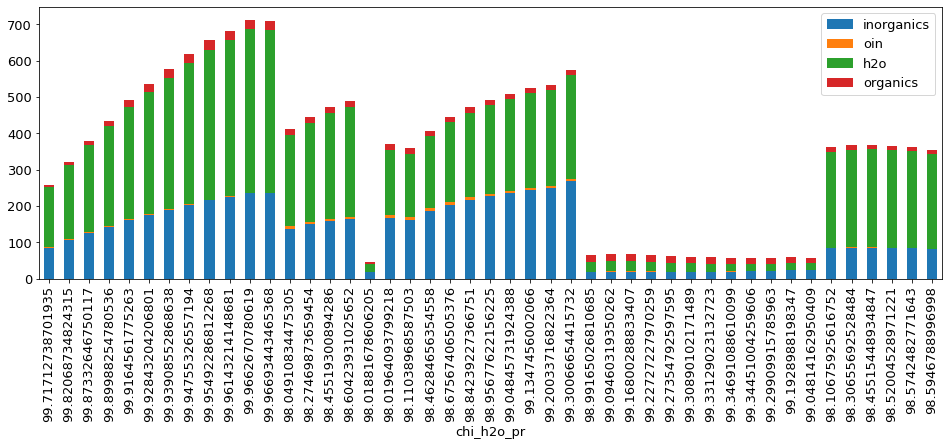

In [13]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

df_m_lowchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
df_m_highchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# time series

## read data

In [17]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [18]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[298.12  298.12  298.12  ... 298.12  298.12  298.12 ]
 [291.038 291.038 291.038 ... 291.038 291.038 291.038]
 [304.349 304.349 304.349 ... 304.349 304.349 304.349]
 ...
 [255.514 255.514 255.514 ... 255.514 255.514 255.514]
 [272.152 272.152 272.152 ... 272.152 272.152 272.152]
 [277.018 277.018 277.018 ... 277.018 277.018 277.018]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [34]:
n2o5_error = (gas_mixing_ratio[2, :, :, 7].ravel() - gas_mixing_ratio[1, :, :, 7].ravel())/gas_mixing_ratio[1, :, :, 7].ravel()
d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         "n2o5_error": n2o5_error * 100,
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         }
df_gas = pd.DataFrame(data=d_gas)

In [39]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

pd.set_option('display.max_rows', None)
print(df_gas_2ndngt.sort_values('n2o5_error', ascending = True))

(1200, 11)
(2400, 11)
          n2o5_ref     n2o5_comp  n2o5_error      o3_ref     o3_comp  \
4653  5.404152e-01  2.543961e-02  -95.292581   81.270401   81.705774   
4652  6.839839e-01  3.431888e-02  -94.982502   83.378873   83.773334   
4651  7.906197e-01  4.127676e-02  -94.779190   85.549522   85.845502   
4650  9.152726e-01  5.172006e-02  -94.349218   87.872849   88.054250   
4649  1.060322e+00  6.784384e-02  -93.601582   90.362156   90.413076   
4648  1.227277e+00  9.281357e-02  -92.437441   93.032697   92.938725   
4647  1.414998e+00  1.316256e-01  -90.697830   95.902570   95.652681   
1958  8.218427e-02  8.167134e-03  -90.062411    0.046069    0.045950   
1959  2.404835e-02  2.456712e-03  -89.784282    0.030323    0.030195   
4899  3.655671e-01  4.234560e-02  -88.416465    0.007325    0.007317   
1957  2.672211e-01  3.101929e-02  -88.391903    0.071862    0.071705   
3968  9.415469e-01  1.097523e-01  -88.343407   70.083593   74.495112   
4646  1.615628e+00  1.912246e-01  -88.1640

In [36]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_lownox'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

nitrate_error = ((gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel())-(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel()))/(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel())
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'nitrate_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel(),
          'nitrate_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel(),
          'nitrate_error': nitrate_error * 100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 7)


In [40]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

pd.set_option('display.max_rows', None)
print(df_aero_2ndngt.sort_values('nitrate_error', ascending = True))

(1200, 7)
         no3_ref    no3_comp  nitrate_ref  nitrate_comp  nitrate_error  \
138     3.408349    0.000000     3.463028      0.055124     -98.408219   
139     3.309494    0.000000     3.367510      0.055276     -98.358560   
140     3.281669    0.000000     3.342312      0.057511     -98.279309   
141     3.226682    0.000000     3.290160      0.059979     -98.177008   
142     3.219356    0.000000     3.285636      0.062337     -98.102738   
143     3.161897    0.000000     3.231100      0.064696     -97.997695   
144     3.164036    0.000000     3.236208      0.067680     -97.908655   
145     3.158477    0.000000     3.255046      0.091176     -97.198921   
146     3.153311    0.000000     3.265831      0.105967     -96.755277   
1117    3.616355    3.886592    33.867093     28.263526     -16.545758   
1116    3.722907    3.994156    31.241593     26.145178     -16.312918   
1118    3.438786    3.738333    35.642208     29.887965     -16.144462   
1119    3.317241    3.586856

In [30]:
n2o5_error = (df_gas_2ndngt["n2o5_comp"] - df_gas_2ndngt["n2o5_ref"])/df_gas_2ndngt["n2o5_ref"]
nitrate_error = ((df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"])-(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"]))/(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"])
print(n2o5_error.max(),n2o5_error.min(),nitrate_error.max(),nitrate_error.min())
print(n2o5_error.sort_values(ascending = True))
print(nitrate_error.sort_values(ascending = True))
print(df_gas_2ndngt)
print(df_aero_2ndngt)

1.3501964520393375 -0.9529258050194493 57.21725968818896 -0.9840821916911371
4653   -0.952926
4652   -0.949825
4651   -0.947792
4650   -0.943492
4649   -0.936016
          ...   
4115    0.989895
1124    1.033902
1125    1.097285
3617    1.101409
4104    1.350196
Length: 1200, dtype: float64
138     -0.984082
139     -0.983586
140     -0.982793
141     -0.981770
142     -0.981027
          ...    
4301     1.315329
4300     1.403593
2145     1.428452
2144     1.555589
1850    57.217260
Length: 1200, dtype: float64
      n2o5_ref  n2o5_comp      o3_ref     o3_comp      no_ref     no_comp  \
37    0.003926   0.002177   94.774948   97.785317    0.118618    0.085318   
38    0.017143   0.017230   84.521311   86.537569    2.888902    2.727907   
39    0.023313   0.023420   93.140233   94.439691    6.458488    6.247797   
40    0.039419   0.039370  118.293176  119.354491    7.880271    7.686334   
41    0.071247   0.070968  158.421216  159.656121    7.253271    7.082722   
...        ...    

## plot

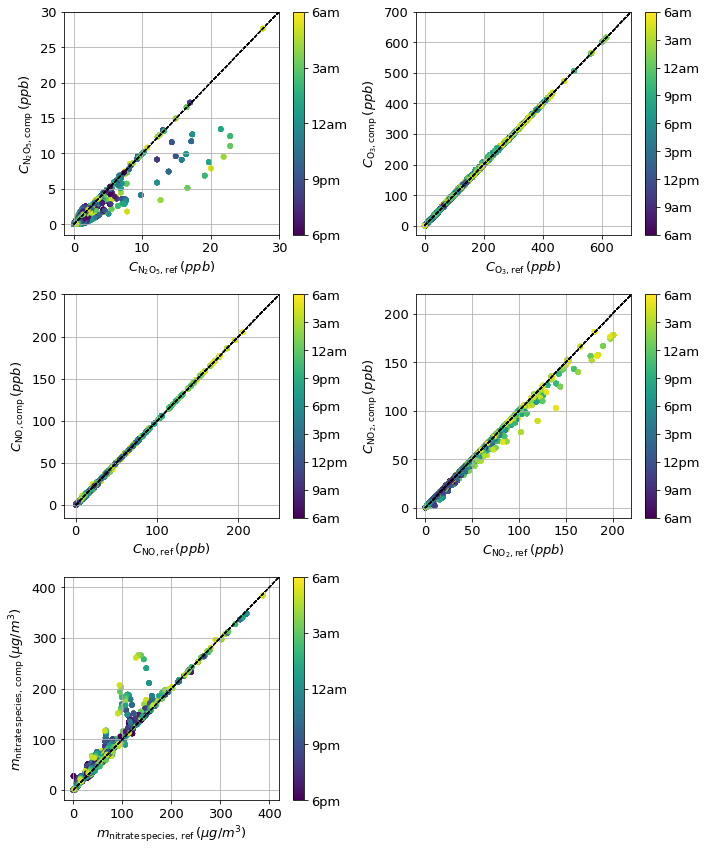

In [25]:
plt.figure(figsize=(10,12))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(-1.5,30); plt.ylim(-1.5,30)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-30,700); plt.ylim(-30,700)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-15,250); plt.ylim(-15,250)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-10,220); plt.ylim(-10,220)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-20,420); plt.ylim(-20,420)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.subplot(3,2,6)
# for t in range(37, 49, 1):
#     p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
#     plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

# plt.clim(37,49)
# cbar = plt.colorbar(ticks = np.linspace(37,49,5))
# cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# plt.xlim(-10,200); plt.ylim(-10,200)
# plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
# plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
# plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_time_series.pdf')